In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_csv('regression_project.csv')
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17377,17378.0,2012-12-31,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,NaN,61.0
17378,17379.0,2012-12-31,1.0,1.0,12.0,23.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.65,0.1343,12.0,NaN,49.0
17379,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
17380,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17382 entries, 0 to 17381
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17376 non-null  float64
 1   dteday      17376 non-null  object 
 2   season      17376 non-null  float64
 3   yr          17376 non-null  float64
 4   mnth        17376 non-null  float64
 5   hr          17376 non-null  float64
 6   holiday     17376 non-null  float64
 7   weekday     17376 non-null  float64
 8   workingday  17376 non-null  float64
 9   weathersit  17376 non-null  float64
 10  temp        17376 non-null  float64
 11  atemp       17376 non-null  float64
 12  hum         17376 non-null  float64
 13  windspeed   17376 non-null  float64
 14  casual      17376 non-null  float64
 15  registered  9999 non-null   float64
 16  cnt         17376 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [5]:
df.shape

(17382, 17)

In [6]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17377,17378.0,2012-12-31,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,NaN,61.0
17378,17379.0,2012-12-31,1.0,1.0,12.0,23.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.65,0.1343,12.0,NaN,49.0
17379,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
17380,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0


In [7]:
df_nona = df.dropna()
df_nona

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,9999.0,2012-02-26,1.0,1.0,2.0,15.0,0.0,0.0,0.0,1.0,0.36,0.3485,0.29,0.0000,72.0,281.0,353.0
9999,10000.0,2012-02-26,1.0,1.0,2.0,16.0,0.0,0.0,0.0,1.0,0.36,0.3333,0.32,0.2537,64.0,275.0,339.0
17379,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
17380,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0


In [8]:
df_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 17381
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     9999 non-null   float64
 1   dteday      9999 non-null   object 
 2   season      9999 non-null   float64
 3   yr          9999 non-null   float64
 4   mnth        9999 non-null   float64
 5   hr          9999 non-null   float64
 6   holiday     9999 non-null   float64
 7   weekday     9999 non-null   float64
 8   workingday  9999 non-null   float64
 9   weathersit  9999 non-null   float64
 10  temp        9999 non-null   float64
 11  atemp       9999 non-null   float64
 12  hum         9999 non-null   float64
 13  windspeed   9999 non-null   float64
 14  casual      9999 non-null   float64
 15  registered  9999 non-null   float64
 16  cnt         9999 non-null   float64
dtypes: float64(16), object(1)
memory usage: 1.4+ MB


In [9]:
df_nona.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,5000.839984,2.308631,0.135514,5.880488,11.558356,0.030903,3.008101,0.679268,1.440344,0.462274,0.444907,0.635382,0.193639,26.431043,116.692569,143.123612
std,2886.864436,1.151009,0.342288,3.642125,6.909524,0.173064,2.008293,0.466781,0.654601,0.199539,0.179050,0.196737,0.124830,37.310498,110.576429,132.839531
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2501.500000,1.000000,0.000000,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.300000,0.303000,0.480000,0.104500,3.000000,27.000000,31.000000
50%,5001.000000,2.000000,0.000000,6.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.440000,0.439400,0.640000,0.194000,12.000000,91.000000,109.000000
75%,7500.500000,3.000000,0.000000,9.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.606100,0.800000,0.283600,35.000000,169.000000,210.000000
max,10000.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,1.000000,0.850700,272.000000,567.000000,651.000000


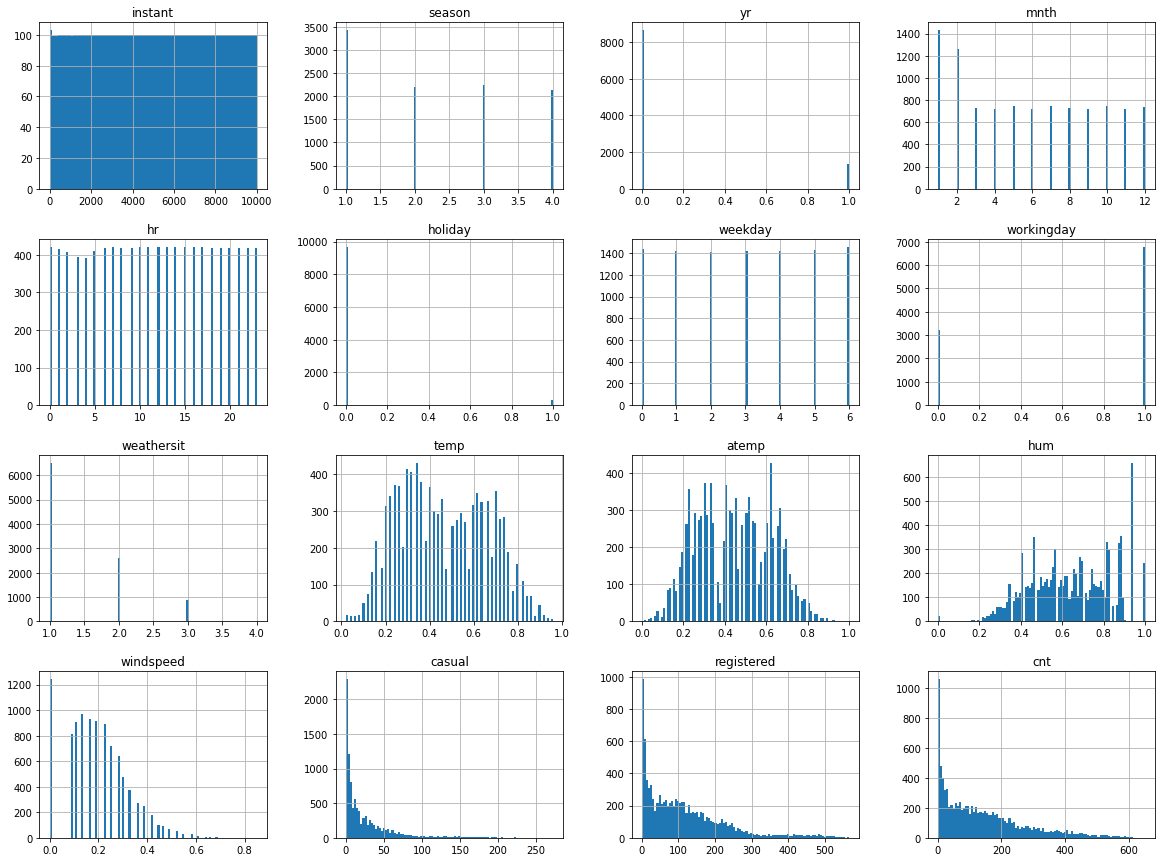

In [10]:
df_nona.hist(bins=100, figsize=(20, 15))
plt.show()

### Main Purpose for this Final Project
* From the independent varialbes, we want to predict the count of total rental bikes including both casual and registered(cnt).
* What is the meaningful value of independent value? (how importantly affect the cnt depending on independent variables X)
* How can we handle the non-numeric variables? (how can we transform in order to interpret as regression)
* How can we interpret the result? 

### Hypothesis 1
* Numeric variables will affect the cnt

In [11]:
df_1 = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

In [12]:
df_1

,temp,atemp,hum,windspeed,cnt
0,0.24,0.2879,0.81,0.0000,16.0
1,0.22,0.2727,0.80,0.0000,40.0
2,0.22,0.2727,0.80,0.0000,32.0
3,0.24,0.2879,0.75,0.0000,13.0
4,0.24,0.2879,0.75,0.0000,1.0
...,...,...,...,...,...
17377,0.26,0.2727,0.56,0.1343,61.0
17378,0.26,0.2727,0.65,0.1343,49.0
17379,0.24,0.2879,0.81,0.0000,16.0
17380,0.24,0.2879,0.81,0.0000,16.0


In [13]:
df_1.describe()

,temp,atemp,hum,windspeed,cnt
count,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000
mean,0.496994,0.475791,0.627337,0.190020,189.422364
std,0.192540,0.171822,0.192913,0.122341,181.384969
min,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,40.000000
50%,0.500000,0.484800,0.630000,0.194000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,281.000000
max,1.000000,1.000000,1.000000,0.850700,977.000000


In [14]:
df_1_drop = df_1.dropna()
df_1_drop

,temp,atemp,hum,windspeed,cnt
0,0.24,0.2879,0.81,0.0000,16.0
1,0.22,0.2727,0.80,0.0000,40.0
2,0.22,0.2727,0.80,0.0000,32.0
3,0.24,0.2879,0.75,0.0000,13.0
4,0.24,0.2879,0.75,0.0000,1.0
...,...,...,...,...,...
17377,0.26,0.2727,0.56,0.1343,61.0
17378,0.26,0.2727,0.65,0.1343,49.0
17379,0.24,0.2879,0.81,0.0000,16.0
17380,0.24,0.2879,0.81,0.0000,16.0


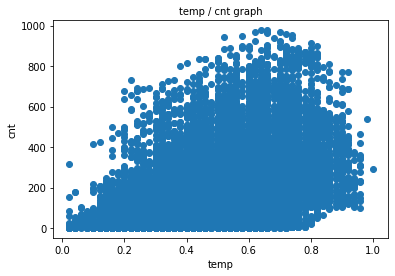

In [15]:
plt.scatter( x = df_1_drop["temp"], y = df_1_drop["cnt"])
plt.xlabel("temp")
plt.ylabel("cnt")
plt.title("temp / cnt graph", fontsize = 10 )
plt.show()

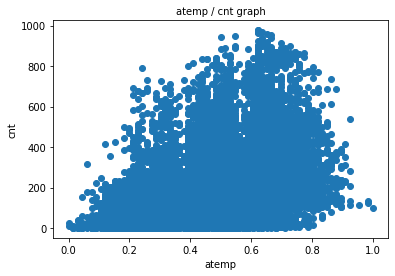

In [16]:
plt.scatter( x = df_1_drop["atemp"], y = df_1_drop["cnt"])
plt.xlabel("atemp")
plt.ylabel("cnt")
plt.title("atemp / cnt graph", fontsize = 10 )
plt.show()

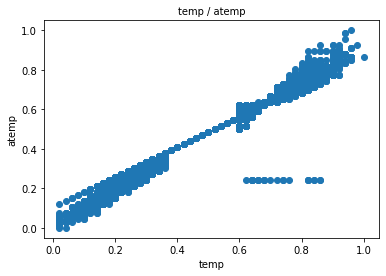

In [17]:
plt.scatter( x = df_1_drop["temp"], y = df_1_drop["atemp"])
plt.xlabel("temp")
plt.ylabel("atemp")
plt.title("temp / atemp", fontsize = 10 )
plt.show()

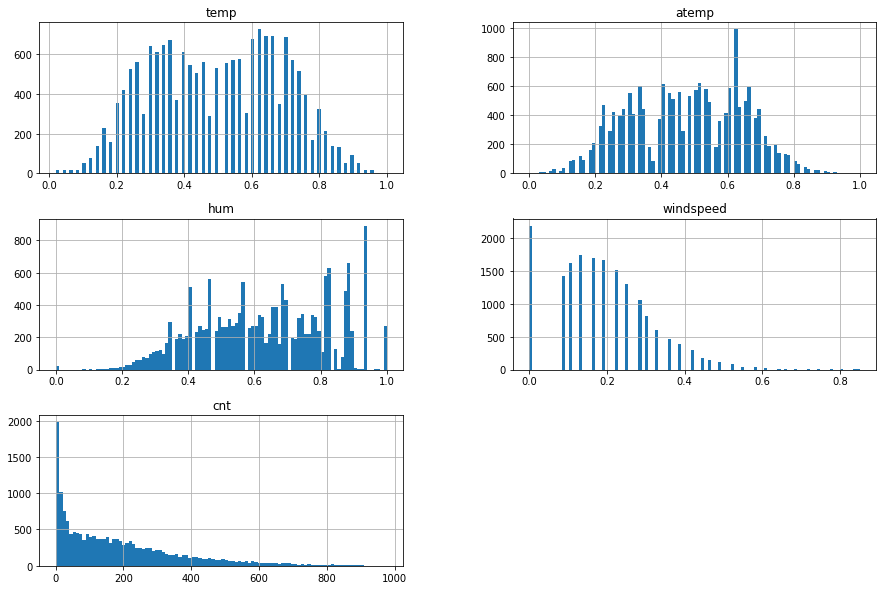

In [18]:
df_1_drop.hist(bins=100, figsize=(15,10))
plt.show()

Text(0.5, 1.0, 'Correlation')

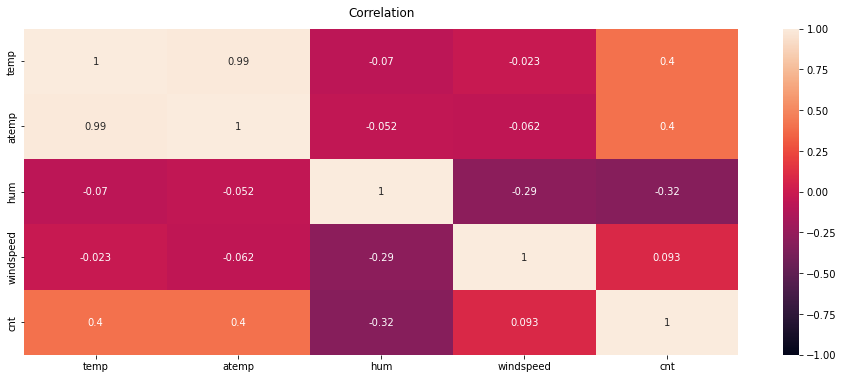

In [19]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_1_drop.corr(), vmin=-1, vmax=1, annot=True)  
heatmap.set_title('Correlation',  pad=12)

In [20]:
df_1_drop.corr()['cnt'].sort_values(ascending=False)

cnt          1.000000
temp         0.404757
atemp        0.400895
windspeed    0.093362
hum         -0.323113
Name: cnt, dtype: float64

Text(0.5, 1.0, 'Correlation')

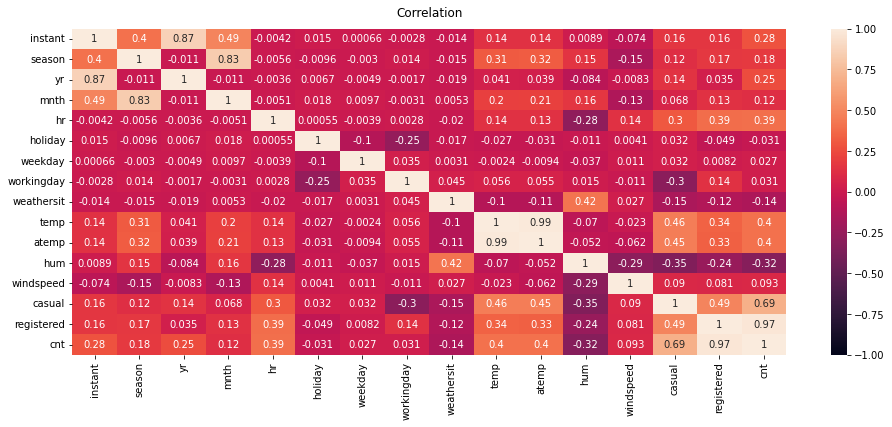

In [21]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)  
heatmap.set_title('Correlation',  pad=12)

In [22]:
df.corr()['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.969486
casual        0.694515
temp          0.404757
atemp         0.400895
hr            0.394399
instant       0.278424
yr            0.250465
season        0.178181
mnth          0.120764
windspeed     0.093362
workingday    0.030742
weekday       0.026521
holiday      -0.030892
weathersit   -0.142297
hum          -0.323113
Name: cnt, dtype: float64

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

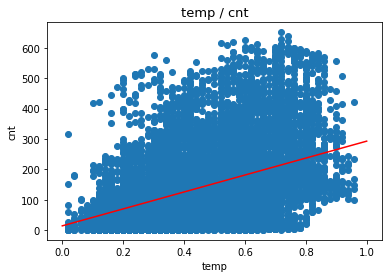

In [23]:
X = df_nona["temp"].values.reshape(-1,1)
y = df_nona["cnt"].values.reshape(-1,1)
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)
x = np.arange(0,1.2, 1)
y = np.arange(0,650, 100)
y = float(model.intercept_) + x*float(model.coef_)
plt.plot(x,y, 'r')
plt.scatter( x = df_nona["temp"], y = df_nona["cnt"])
plt.xlabel("temp")
plt.ylabel("cnt")
plt.title("temp / cnt", fontsize = 13)
plt.figsize(100000,1000)
plt.show()

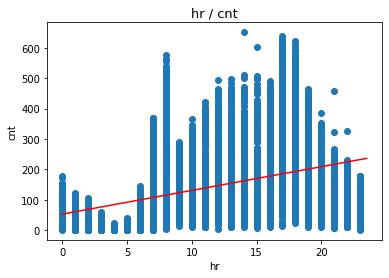

In [24]:
X = df_nona["hr"].values.reshape(-1,1)
y = df_nona["cnt"].values.reshape(-1,1)
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)
x = np.arange(0,24, 0.5)
y = float(model.intercept_) + x*float(model.coef_)
plt.plot(x,y, 'r')
plt.scatter( x = df_nona["hr"], y = df_nona["cnt"])
plt.xlabel("hr")
plt.ylabel("cnt")
plt.title("hr / cnt", fontsize = 13 )
plt.show()

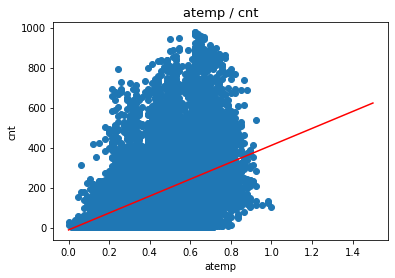

In [25]:
X = df_1_drop["atemp"].values.reshape(-1,1)
y = df_1_drop["cnt"].values.reshape(-1,1)
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)
x = np.arange(0,1.5, 0.000001)
y = float(model.intercept_) + x*float(model.coef_)
plt.plot(x,y, 'r')
plt.scatter( x = df_1_drop["atemp"], y = df_1_drop["cnt"])
plt.xlabel("atemp")
plt.ylabel("cnt")
plt.title("atemp / cnt", fontsize = 13 )
plt.show()

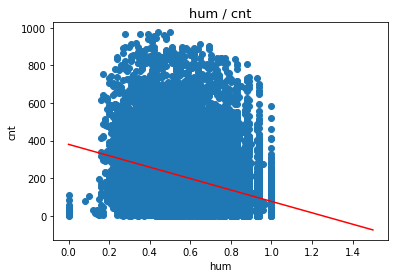

In [26]:
X = df_1_drop["hum"].values.reshape(-1,1)
y = df_1_drop["cnt"].values.reshape(-1,1)
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)
x = np.arange(0,1.5, 0.000001)
y = float(model.intercept_) + x*float(model.coef_)
plt.plot(x,y, 'r')
plt.scatter( x = df_1_drop["hum"], y = df_1_drop["cnt"])
plt.xlabel("hum")
plt.ylabel("cnt")
plt.title("hum / cnt", fontsize = 13 )
plt.show()

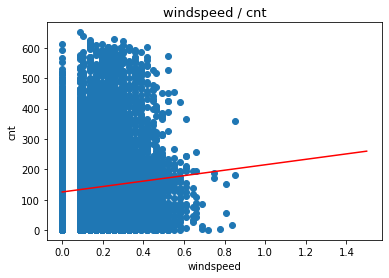

In [27]:
X = df_nona["windspeed"].values.reshape(-1,1)
y = df_nona["cnt"].values.reshape(-1,1)
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)
x = np.arange(0,1.5, 0.000001)
y = float(model.intercept_) + x*float(model.coef_)
plt.plot(x,y, 'r')
plt.scatter( x = df_nona["windspeed"], y = df_nona["cnt"])
plt.xlabel("windspeed")
plt.ylabel("cnt")
plt.title("windspeed / cnt", fontsize = 13 )
plt.show()

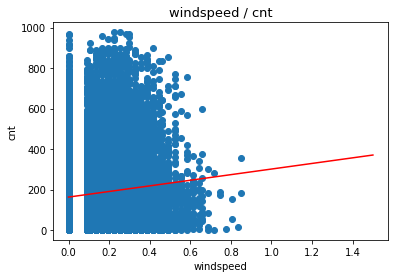

In [28]:
X = df_1_drop["windspeed"].values.reshape(-1,1)
y = df_1_drop["cnt"].values.reshape(-1,1)
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)
x = np.arange(0,1.5, 0.000001)
y = float(model.intercept_) + x*float(model.coef_)
plt.plot(x,y, 'r')
plt.scatter( x = df_1_drop["windspeed"], y = df_1_drop["cnt"])
plt.xlabel("windspeed")
plt.ylabel("cnt")
plt.title("windspeed / cnt", fontsize = 13 )
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [38]:
# 추가 필요

XX = ["temp", "atemp", "hum", "windspeed"]
y = df_1_drop["cnt"].values.reshape(-1,1)
from sklearn import linear_model

for i in XX:
    X = df_1_drop[i].values.reshape(-1,1)
    scalar1 = StandardScaler()
    scalar1.fit(X)
    X1_num = scalar1.transform(X)
    X1_train,X1_test = train_test_split( X1_num, test_size=0.2, random_state=0)
    y1_train,y1_test = train_test_split( y, test_size=0.2, random_state=0)
    lin_reg1 = linear_model.LinearRegression()

    lin_reg1.fit(X1_train, y1_train)
    lin_reg1.score(X1_train, y1_train)
    y1_pred_train = lin_reg1.predict(X1_train)
    y1_pred_test = lin_reg1.predict(X1_test)
    lin_reg_mse1 = mean_squared_error(y1_train, y1_pred_train)
    lin_reg_mae1 = mean_absolute_error(y1_train, y1_pred_train)
    lin_reg_mse2 = mean_squared_error(y1_test, y1_pred_test)
    lin_reg_mae2 = mean_absolute_error(y1_test, y1_pred_test)
    print(f"Sinple LR ({i}) output : ")
    print(f' train) MAE: {lin_reg_mae1:.4f}, MSE: {lin_reg_mse1:.4f}, RMSE: {np.sqrt(lin_reg_mse1):.4f}')
    print(f' test)  MAE: {lin_reg_mae2:.4f}, MSE: {lin_reg_mse2:.4f}, RMSE: {np.sqrt(lin_reg_mse2):.4f}')
    print()

Sinple LR (temp) output : 
 train) MAE: 126.6633, MSE: 27939.6371, RMSE: 167.1515
 test)  MAE: 121.7190, MSE: 25790.0597, RMSE: 160.5928

Sinple LR (atemp) output : 
 train) MAE: 127.0514, MSE: 28034.4043, RMSE: 167.4348
 test)  MAE: 122.1340, MSE: 25922.2120, RMSE: 161.0038

Sinple LR (hum) output : 
 train) MAE: 132.4239, MSE: 29770.2487, RMSE: 172.5406
 test)  MAE: 129.9105, MSE: 28241.8313, RMSE: 168.0531

Sinple LR (windspeed) output : 
 train) MAE: 142.4666, MSE: 32933.6206, RMSE: 181.4762
 test)  MAE: 139.9700, MSE: 31331.1248, RMSE: 177.0060



#### Multiple Linear Regression

In [40]:
X = df_1_drop[["temp", "atemp", "hum", "windspeed"]]
y = df_1_drop["cnt"].values.reshape(-1,1)
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [41]:
from sklearn.preprocessing import StandardScaler

scalar1 = StandardScaler()
scalar1.fit(X.values)
X1_num = scalar1.transform(X.values)

In [42]:
X1_train,X1_test = train_test_split( X1_num, test_size=0.2, random_state=0)
y1_train,y1_test = train_test_split( y, test_size=0.2, random_state=0)

In [43]:
print("X1_train's number : ", len(X1_train))
print("X1_test's number  : ",len( X1_test))
print("y1_train's number : ", len(y1_train))
print("y1_test's number  : ",len( y1_test))

X1_train's number :  13900
X1_test's number  :  3476
y1_train's number :  13900
y1_test's number  :  3476


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
lin_reg1 = linear_model.LinearRegression()
lin_reg1.fit(X1_train, y1_train)
lin_reg1.score(X1_train, y1_train)
y1_pred_train = lin_reg1.predict(X1_train)
y1_pred_test = lin_reg1.predict(X1_test)
lin_reg_mse1 = mean_squared_error(y1_train, y1_pred_train)
lin_reg_mae1 = mean_absolute_error(y1_train, y1_pred_train)
lin_reg_mse2 = mean_squared_error(y1_test, y1_pred_test)
lin_reg_mae2 = mean_absolute_error(y1_test, y1_pred_test)
print("Data_1st's output : ")
print(f'train) MAE: {lin_reg_mae1:.4f}, MSE: {lin_reg_mse1:.4f}, RMSE: {np.sqrt(lin_reg_mse1):.4f}')
print(f'test) MAE: {lin_reg_mae2:.4f}, MSE: {lin_reg_mse2:.4f}, RMSE: {np.sqrt(lin_reg_mse2):.4f}')
print()

Data_1st's output : 
train) MAE: 117.8561, MSE: 24958.3604, RMSE: 157.9822
test) MAE: 113.8586, MSE: 22987.9216, RMSE: 151.6177



In [42]:
y1_train

array([[ 70.],
       [602.],
       [427.],
       ...,
       [110.],
       [ 44.],
       [153.]])

In [43]:
y1_pred_train

array([[120.5386539 ],
       [282.33995383],
       [284.63147361],
       ...,
       [ 90.37367997],
       [ 70.16331514],
       [253.76753528]])

### Decision Tree

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from dmba import plotDecisionTree
import matplotlib.pyplot as plt

no display found. Using non-interactive Agg backend


/var/folders/jl/wmntyy4d25q2v0ldmswng8040000gn/T/ipykernel_21368/417724291.py:37: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/var/folders/jl/wmntyy4d25q2v0ldmswng8040000gn/T/ipykernel_21368/417724291.py:37: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/var/folders/jl/wmntyy4d25q2v0ldmswng8040000gn/T/ipykernel_21368/417724291.py:37: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/var/folders/jl/wmntyy4d25q2v0ldmswng8040000gn/T/ipykernel_21368/417724291.py:37: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


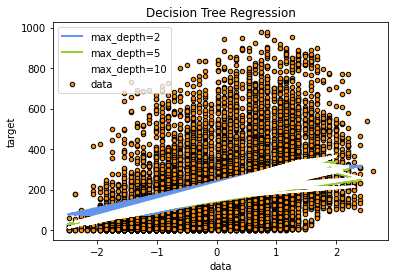

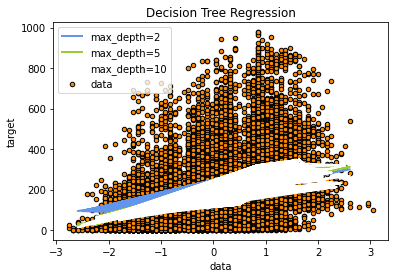

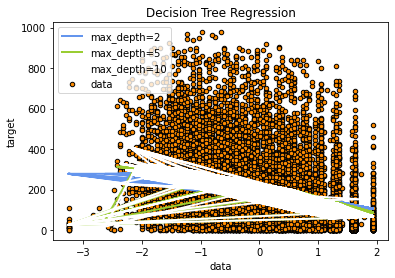

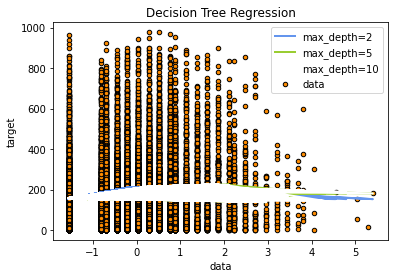

In [119]:
XX = ["temp", "atemp", "hum", "windspeed"]
y = df_1_drop["cnt"].values.reshape(-1,1)
from sklearn import linear_model

for i in XX:
    X = df_1_drop[i].values.reshape(-1,1)
    scalar1 = StandardScaler()
    scalar1.fit(X)
    X1_num = scalar1.transform(X)
    X1_train,X1_test = train_test_split( X1_num, test_size=0.2, random_state=0)
    y1_train,y1_test = train_test_split( y, test_size=0.2, random_state=0)
    in_reg1 = linear_model.LinearRegression()

    
    # Fit regression model
    regr_1 = DecisionTreeRegressor(max_depth=2)
    regr_2 = DecisionTreeRegressor(max_depth=5)
    regr_3 = DecisionTreeRegressor(max_depth=10)
    regr_1.fit(X1_train, y1_train)
    regr_2.fit(X1_train, y1_train)
    regr_3.fit(X1_train, y1_train)
    # Predict
    y_1 = regr_1.predict(X1_test)
    y_2 = regr_2.predict(X1_test)
    y_3 = regr_3.predict(X1_test)
    y1_pred_train = regr_2.predict(X1_train)
    # Plot the results
    plt.figure()
    plt.scatter(X1_train, y1_train, s=20, edgecolor="black", c="darkorange", label="data")
    plt.plot(X1_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
    plt.plot(X1_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
    plt.plot(X1_test, y_3, color="white", label="max_depth=10", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()

In [177]:
XX = ["temp", "atemp", "hum", "windspeed"]
y = df_1_drop["cnt"].values.reshape(-1,1)
from sklearn import linear_model

for i in XX:
    X = df_1_drop[i].values.reshape(-1,1)
    scalar1 = StandardScaler()
    scalar1.fit(X)
    X1_num = scalar1.transform(X)
    X1_train,X1_test = train_test_split( X1_num, test_size=0.2, random_state=0)
    y1_train,y1_test = train_test_split( y, test_size=0.2, random_state=0)
    in_reg1 = linear_model.LinearRegression()

    for j in [1, 2, 5, 8, 10, 15, 20 ,50, 100]:
    # Fit regression model
        regr_1 = DecisionTreeRegressor(max_depth=j)
        regr_1.fit(X1_train, y1_train)
    
        # Predict
        y_1 = regr_1.predict(X1_test)
        y1_pred_train = regr_1.predict(X1_train)
    
        lin_reg_mse1 = mean_squared_error(y1_train, y1_pred_train)
        lin_reg_mae1 = mean_absolute_error(y1_train, y1_pred_train)
        lin_reg_mse2 = mean_squared_error(y1_test, y_1)
        lin_reg_mae2 = mean_absolute_error(y1_test, y_1)

        print(f"Sinple DT ({i}) output : (max_depth ={j}) ")
        print(f' train) MAE: {lin_reg_mae1:.4f}, MSE: {lin_reg_mse1:.4f}, RMSE: {np.sqrt(lin_reg_mse1):.4f}')
        print(f' test ) MAE: {lin_reg_mae2:.4f}, MSE: {lin_reg_mse2:.4f}, RMSE: {np.sqrt(lin_reg_mse2):.4f}')
        print()
    print()

Sinple DT (temp) output : (max_depth =1) 
 train) MAE: 131.9515, MSE: 29570.0309, RMSE: 171.9594
 test ) MAE: 128.4718, MSE: 27726.7590, RMSE: 166.5135

Sinple DT (temp) output : (max_depth =2) 
 train) MAE: 126.5566, MSE: 27919.3767, RMSE: 167.0909
 test ) MAE: 121.9150, MSE: 25680.9923, RMSE: 160.2529

Sinple DT (temp) output : (max_depth =5) 
 train) MAE: 125.7311, MSE: 27591.2748, RMSE: 166.1062
 test ) MAE: 120.9261, MSE: 25412.1139, RMSE: 159.4118

Sinple DT (temp) output : (max_depth =8) 
 train) MAE: 125.6266, MSE: 27572.2040, RMSE: 166.0488
 test ) MAE: 120.8992, MSE: 25416.9277, RMSE: 159.4269

Sinple DT (temp) output : (max_depth =10) 
 train) MAE: 125.6195, MSE: 27568.2038, RMSE: 166.0368
 test ) MAE: 120.8813, MSE: 25407.7440, RMSE: 159.3981

Sinple DT (temp) output : (max_depth =15) 
 train) MAE: 125.6195, MSE: 27568.2038, RMSE: 166.0368
 test ) MAE: 120.8813, MSE: 25407.7440, RMSE: 159.3981

Sinple DT (temp) output : (max_depth =20) 
 train) MAE: 125.6195, MSE: 27568.203

# multi

In [208]:
X = df_1_drop[["temp", "atemp", "hum", "windspeed"]]
y = df_1_drop["cnt"].values.reshape(-1,1)

scalar1 = StandardScaler()
scalar1.fit(X)
X1_num = scalar1.transform(X)
X1_train,X1_test = train_test_split( X1_num, test_size=0.2, random_state=0)
y1_train,y1_test = train_test_split( y, test_size=0.2, random_state=0)
for j in [1, 2, 5, 8, 10, 15, 20 ,50, 100, 200, 500]:
# Fit regression model
    regr_1 = DecisionTreeRegressor(max_depth=j)
    regr_1.fit(X1_train, y1_train)

    # Predict
    y_1 = regr_1.predict(X1_test)
    y1_pred_train = regr_1.predict(X1_train)

    lin_reg_mse1 = mean_squared_error(y1_train, y1_pred_train)
    lin_reg_mae1 = mean_absolute_error(y1_train, y1_pred_train)
    lin_reg_mse2 = mean_squared_error(y1_test, y_1)
    lin_reg_mae2 = mean_absolute_error(y1_test, y_1)
    
    print(f"Sinple DT  output : (max_depth ={j}) ")
    print(f' train) MAE: {lin_reg_mae1:.4f}, MSE: {lin_reg_mse1:.4f}, RMSE: {np.sqrt(lin_reg_mse1):.4f}')
    print(f' test ) MAE: {lin_reg_mae2:.4f}, MSE: {lin_reg_mse2:.4f}, RMSE: {np.sqrt(lin_reg_mse2):.4f}')
    print()
    
    #bias -variance decomposition 

Sinple DT  output : (max_depth =1) 
 train) MAE: 130.1309, MSE: 28724.3325, RMSE: 169.4825
 test ) MAE: 125.8164, MSE: 26764.5423, RMSE: 163.5987

Sinple DT  output : (max_depth =2) 
 train) MAE: 123.4233, MSE: 26419.1907, RMSE: 162.5398
 test ) MAE: 119.0028, MSE: 24310.6177, RMSE: 155.9186

Sinple DT  output : (max_depth =5) 
 train) MAE: 114.3654, MSE: 23611.5052, RMSE: 153.6604
 test ) MAE: 111.6940, MSE: 22268.7421, RMSE: 149.2271

Sinple DT  output : (max_depth =8) 
 train) MAE: 109.8888, MSE: 22252.6669, RMSE: 149.1733
 test ) MAE: 112.6046, MSE: 22878.3547, RMSE: 151.2559

Sinple DT  output : (max_depth =10) 
 train) MAE: 104.6221, MSE: 20606.3429, RMSE: 143.5491
 test ) MAE: 115.2976, MSE: 24372.9489, RMSE: 156.1184

Sinple DT  output : (max_depth =15) 
 train) MAE: 83.5846, MSE: 15185.9143, RMSE: 123.2311
 test ) MAE: 127.6125, MSE: 31090.4443, RMSE: 176.3248

Sinple DT  output : (max_depth =20) 
 train) MAE: 72.2258, MSE: 12794.3888, RMSE: 113.1123
 test ) MAE: 132.5572, MSE

# Random Forest

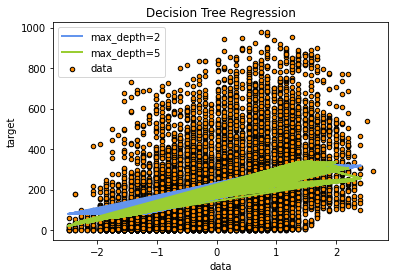

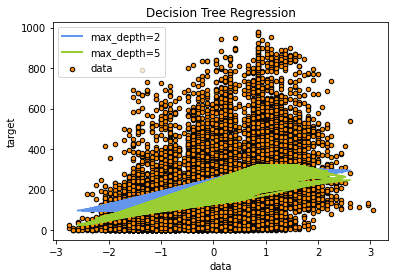

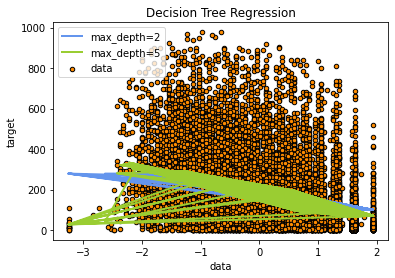

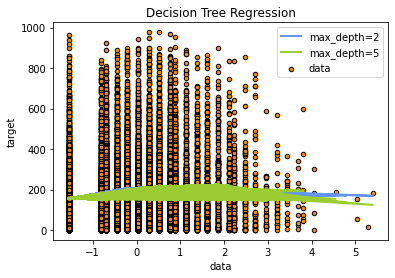

In [209]:
from sklearn.ensemble import RandomForestRegressor
XX = ["temp", "atemp", "hum", "windspeed"]
y = df_1_drop["cnt"].values.reshape(-1,1)
from sklearn import linear_model

for i in XX:
    X = df_1_drop[i].values.reshape(-1,1)
    scalar1 = StandardScaler()
    scalar1.fit(X)
    X1_num = scalar1.transform(X)
    X1_train,X1_test = train_test_split( X1_num, test_size=0.2, random_state=0)
    y1_train,y1_test = train_test_split( y, test_size=0.2, random_state=0)
    
    # Fit regression model
    regr_1 = RandomForestRegressor(max_depth=2)
    regr_2 = RandomForestRegressor(max_depth=5)
    regr_1.fit(X1_train, y1_train)
    regr_2.fit(X1_train, y1_train)
    regr_3.fit(X1_train, y1_train)
    # Predict
    y_1 = regr_1.predict(X1_test)
    y_2 = regr_2.predict(X1_test)
    y1_pred_train = regr_2.predict(X1_train)
    # Plot the results
    plt.figure()
    plt.scatter(X1_train, y1_train, s=20, edgecolor="black", c="darkorange", label="data")
    plt.plot(X1_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
    plt.plot(X1_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()

In [210]:
XX = ["temp", "atemp", "hum", "windspeed"]
y = df_1_drop["cnt"].values.reshape(-1,1)

for i in XX:
    X = df_1_drop[i].values.reshape(-1,1)
    scalar1 = StandardScaler()
    scalar1.fit(X)
    X1_num = scalar1.transform(X)
    X1_train,X1_test = train_test_split( X1_num, test_size=0.2, random_state=0)
    y1_train,y1_test = train_test_split( y, test_size=0.2, random_state=0)

    for j in [1, 2, 5, 8, 10, 15, 20 ,50, 100]:
    # Fit regression model
        regr_1 = RandomForestRegressor(max_depth=j)
        regr_1.fit(X1_train, y1_train)
    
        # Predict
        y_1 = regr_1.predict(X1_test)
        y1_pred_train = regr_1.predict(X1_train)
    
        lin_reg_mse1 = mean_squared_error(y1_train, y1_pred_train)
        lin_reg_mae1 = mean_absolute_error(y1_train, y1_pred_train)
        lin_reg_mse2 = mean_squared_error(y1_test, y_1)
        lin_reg_mae2 = mean_absolute_error(y1_test, y_1)

        print(f"Sinple RF ({i}) output : (max_depth ={j}) ")
        print(f' train) MAE: {lin_reg_mae1:.4f}, MSE: {lin_reg_mse1:.4f}, RMSE: {np.sqrt(lin_reg_mse1):.4f}')
        print(f' test ) MAE: {lin_reg_mae2:.4f}, MSE: {lin_reg_mse2:.4f}, RMSE: {np.sqrt(lin_reg_mse2):.4f}')
        print()
    print()

Sinple RF (temp) output : (max_depth =1) 
 train) MAE: 131.8352, MSE: 29465.7178, RMSE: 171.6558
 test ) MAE: 128.2241, MSE: 27636.0019, RMSE: 166.2408

Sinple RF (temp) output : (max_depth =2) 
 train) MAE: 126.3266, MSE: 27794.2360, RMSE: 166.7160
 test ) MAE: 121.5932, MSE: 25549.5969, RMSE: 159.8424

Sinple RF (temp) output : (max_depth =5) 
 train) MAE: 125.6860, MSE: 27587.2837, RMSE: 166.0942
 test ) MAE: 120.9105, MSE: 25402.1333, RMSE: 159.3805

Sinple RF (temp) output : (max_depth =8) 
 train) MAE: 125.6094, MSE: 27569.8138, RMSE: 166.0416
 test ) MAE: 120.8714, MSE: 25406.0693, RMSE: 159.3928

Sinple RF (temp) output : (max_depth =10) 
 train) MAE: 125.6357, MSE: 27569.6518, RMSE: 166.0411
 test ) MAE: 120.8660, MSE: 25402.3198, RMSE: 159.3811

Sinple RF (temp) output : (max_depth =15) 
 train) MAE: 125.6310, MSE: 27569.4963, RMSE: 166.0406
 test ) MAE: 120.8660, MSE: 25399.5180, RMSE: 159.3723

Sinple RF (temp) output : (max_depth =20) 
 train) MAE: 125.6039, MSE: 27570.127

### multi

In [211]:
X = df_1_drop[["temp", "atemp", "hum", "windspeed"]]
y = df_1_drop["cnt"].values.reshape(-1,1)

scalar1 = StandardScaler()
scalar1.fit(X)
X1_num = scalar1.transform(X)
X1_train,X1_test = train_test_split( X1_num, test_size=0.2, random_state=0)
y1_train,y1_test = train_test_split( y, test_size=0.2, random_state=0)
for j in [1, 2, 5, 8, 10, 15, 20 ,50, 100, 200, 500]:
# Fit regression model
    regr_1 = RandomForestRegressor(max_depth=j)
    regr_1.fit(X1_train, y1_train)

    # Predict
    y_1 = regr_1.predict(X1_test)
    y1_pred_train = regr_1.predict(X1_train)

    lin_reg_mse1 = mean_squared_error(y1_train, y1_pred_train)
    lin_reg_mae1 = mean_absolute_error(y1_train, y1_pred_train)
    lin_reg_mse2 = mean_squared_error(y1_test, y_1)
    lin_reg_mae2 = mean_absolute_error(y1_test, y_1)
    
    print(f"Sinple RF output : (max_depth ={j}) ")
    print(f' train) MAE: {lin_reg_mae1:.4f}, MSE: {lin_reg_mse1:.4f}, RMSE: {np.sqrt(lin_reg_mse1):.4f}')
    print(f' test ) MAE: {lin_reg_mae2:.4f}, MSE: {lin_reg_mse2:.4f}, RMSE: {np.sqrt(lin_reg_mse2):.4f}')
    print()

Sinple RF output : (max_depth =1) 
 train) MAE: 129.8859, MSE: 28557.5453, RMSE: 168.9898
 test ) MAE: 125.6368, MSE: 26540.2944, RMSE: 162.9119

Sinple RF output : (max_depth =2) 
 train) MAE: 123.0062, MSE: 26246.6193, RMSE: 162.0081
 test ) MAE: 118.7560, MSE: 24176.6449, RMSE: 155.4884

Sinple RF output : (max_depth =5) 
 train) MAE: 113.4268, MSE: 23256.6907, RMSE: 152.5014
 test ) MAE: 110.8392, MSE: 21913.7320, RMSE: 148.0329

Sinple RF output : (max_depth =8) 
 train) MAE: 108.5115, MSE: 21518.6142, RMSE: 146.6922
 test ) MAE: 110.8898, MSE: 22045.4951, RMSE: 148.4773

Sinple RF output : (max_depth =10) 
 train) MAE: 103.2604, MSE: 19571.6680, RMSE: 139.8988
 test ) MAE: 112.1764, MSE: 22620.3551, RMSE: 150.4006

Sinple RF output : (max_depth =15) 
 train) MAE: 87.7004, MSE: 14793.0478, RMSE: 121.6267
 test ) MAE: 118.0417, MSE: 25629.2991, RMSE: 160.0915

Sinple RF output : (max_depth =20) 
 train) MAE: 82.2004, MSE: 13589.8576, RMSE: 116.5755
 test ) MAE: 121.9501, MSE: 27594

In [217]:
# 실제 표준화 하고 안하고 차이는?
# 엄청난 차이는 아님.
X = df_1_drop[["temp", "atemp", "hum", "windspeed"]]
y = df_1_drop["cnt"].values.reshape(-1,1)

X1_num = X.copy()
X1_train,X1_test = train_test_split( X1_num, test_size=0.2, random_state=0)
y1_train,y1_test = train_test_split( y, test_size=0.2, random_state=0)
for j in [1, 2, 5, 8, 10, 15, 20 ,50, 100, 200, 500]:
# Fit regression model
    regr_1 = RandomForestRegressor(max_depth=j)
    regr_1.fit(X1_train, y1_train)

    # Predict
    y_1 = regr_1.predict(X1_test)
    y1_pred_train = regr_1.predict(X1_train)

    lin_reg_mse1 = mean_squared_error(y1_train, y1_pred_train)
    lin_reg_mae1 = mean_absolute_error(y1_train, y1_pred_train)
    lin_reg_mse2 = mean_squared_error(y1_test, y_1)
    lin_reg_mae2 = mean_absolute_error(y1_test, y_1)
    
    print(f"Sinple RF output : (max_depth ={j}) ")
    print(f' train) MAE: {lin_reg_mae1:.4f}, MSE: {lin_reg_mse1:.4f}, RMSE: {np.sqrt(lin_reg_mse1):.4f}')
    print(f' test ) MAE: {lin_reg_mae2:.4f}, MSE: {lin_reg_mse2:.4f}, RMSE: {np.sqrt(lin_reg_mse2):.4f}')
    print()

Sinple RF output : (max_depth =1) 
 train) MAE: 129.9130, MSE: 28564.0461, RMSE: 169.0090
 test ) MAE: 125.6635, MSE: 26553.7093, RMSE: 162.9531

Sinple RF output : (max_depth =2) 
 train) MAE: 122.9043, MSE: 26214.0928, RMSE: 161.9077
 test ) MAE: 118.7097, MSE: 24153.8831, RMSE: 155.4152

Sinple RF output : (max_depth =5) 
 train) MAE: 113.3963, MSE: 23263.3591, RMSE: 152.5233
 test ) MAE: 110.7419, MSE: 21928.8983, RMSE: 148.0841

Sinple RF output : (max_depth =8) 
 train) MAE: 108.5832, MSE: 21529.2732, RMSE: 146.7286
 test ) MAE: 110.9837, MSE: 22096.8058, RMSE: 148.6499

Sinple RF output : (max_depth =10) 
 train) MAE: 103.2445, MSE: 19603.0715, RMSE: 140.0110
 test ) MAE: 112.1567, MSE: 22597.3791, RMSE: 150.3242

Sinple RF output : (max_depth =15) 
 train) MAE: 87.2877, MSE: 14698.0663, RMSE: 121.2356
 test ) MAE: 118.1695, MSE: 25655.3734, RMSE: 160.1729

Sinple RF output : (max_depth =20) 
 train) MAE: 82.0844, MSE: 13586.0223, RMSE: 116.5591
 test ) MAE: 121.5945, MSE: 27545

### 추가적으로 category도 필요하다. 해보자


In [212]:
df_new = df.drop(columns = ["registered", "casual"]).dropna()

df_num = df_new[["temp", "atemp", "hum", "windspeed"]]
df_cat = df_new.drop(columns = ["temp", "atemp", "hum", "windspeed", "cnt"])
y = df_new["cnt"]
print(df_num.shape)
print(df_cat.shape)
print(y.shape)

(17376, 4)
(17376, 10)
(17376,)


In [213]:
#random / decision 은 one-hot이 필요없다.

In [216]:
X = df_new.drop(columns = ["dteday","cnt"])
y = df_new["cnt"].values.reshape(-1,1)

X1_train,X1_test = train_test_split( X1_num, test_size=0.2, random_state=0)
y1_train,y1_test = train_test_split( y, test_size=0.2, random_state=0)
for j in [1, 2, 5, 8, 10, 15, 20 ,50, 100, 200, 500]:
# Fit regression model
    regr_1 = RandomForestRegressor(max_depth=j)
    regr_1.fit(X1_train, y1_train)

    # Predict
    y_1 = regr_1.predict(X1_test)
    y1_pred_train = regr_1.predict(X1_train)

    lin_reg_mse1 = mean_squared_error(y1_train, y1_pred_train)
    lin_reg_mae1 = mean_absolute_error(y1_train, y1_pred_train)
    lin_reg_mse2 = mean_squared_error(y1_test, y_1)
    lin_reg_mae2 = mean_absolute_error(y1_test, y_1)
    
    print(f"Sinple RF output : (max_depth ={j}) ")
    print(f' train) MAE: {lin_reg_mae1:.4f}, MSE: {lin_reg_mse1:.4f}, RMSE: {np.sqrt(lin_reg_mse1):.4f}')
    print(f' test ) MAE: {lin_reg_mae2:.4f}, MSE: {lin_reg_mse2:.4f}, RMSE: {np.sqrt(lin_reg_mse2):.4f}')
    print()

Sinple RF output : (max_depth =1) 
 train) MAE: 129.9109, MSE: 28555.7681, RMSE: 168.9845
 test ) MAE: 125.6669, MSE: 26537.2311, RMSE: 162.9025

Sinple RF output : (max_depth =2) 
 train) MAE: 122.9804, MSE: 26204.4473, RMSE: 161.8779
 test ) MAE: 118.7743, MSE: 24156.9381, RMSE: 155.4250

Sinple RF output : (max_depth =5) 
 train) MAE: 113.4701, MSE: 23269.5951, RMSE: 152.5437
 test ) MAE: 110.8390, MSE: 21917.2281, RMSE: 148.0447

Sinple RF output : (max_depth =8) 
 train) MAE: 108.6280, MSE: 21528.9837, RMSE: 146.7276
 test ) MAE: 110.9280, MSE: 22046.3353, RMSE: 148.4801

Sinple RF output : (max_depth =10) 
 train) MAE: 103.1210, MSE: 19534.2047, RMSE: 139.7648
 test ) MAE: 112.1100, MSE: 22638.2882, RMSE: 150.4603

Sinple RF output : (max_depth =15) 
 train) MAE: 87.4889, MSE: 14747.5477, RMSE: 121.4395
 test ) MAE: 118.2380, MSE: 25647.0692, RMSE: 160.1470

Sinple RF output : (max_depth =20) 
 train) MAE: 82.1965, MSE: 13598.9723, RMSE: 116.6146
 test ) MAE: 121.2150, MSE: 27385